# Delivery 1

In [57]:


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import os
from os.path import dirname as pDir
from os.path import join as pJoin



pd.set_option('display.max_rows',500)

parentDirectoryMain = pDir(pDir(os.path.abspath('__file__')))

In [38]:
country_list = ['US','Jamaica','Belgium']

#### Method:
1. Covid case dataset from John Hopkins : https://github.com/CSSEGISandData/COVID-19.git
2. Vaccination dataset from Johns Hopkins : https://github.com/govex/COVID-19/tree/master/data_tables/vaccine_data/global_data
3. Population dataset from Johns Hopkins : https://github.com/govex/COVID-19/blob/master/data_tables/world_pop_by_country.csv

## Task 1:
- Relative cases overtime of Covid infectors from 3 different countries

In [39]:
csvFilePath  = pJoin(parentDirectoryMain,"data","raw","COVID-19","csse_covid_19_data","csse_covid_19_time_series","time_series_covid19_confirmed_global.csv")

df_covid_cases_raw =  pd.read_csv(csvFilePath)
df_covid_cases_raw.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181534,181574,181666,181725,181808,181912,181987,182033,182072,182149
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,277141,277141,277409,277444,277663,277940,278211,278504,278793,279077
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265968,265971,265975,265985,265993,266006,266015,266025,266030,266038
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43774,43774,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [40]:
df_covid_cases = df_covid_cases_raw.rename(columns = {'Country/Region' : 'country','Province/State':'state'})
df_covid_cases['state'] = df_covid_cases['state'].fillna('no')
df_covid_cases = df_covid_cases.drop(['Lat','Long'], axis=1)

In [41]:
df_covid_cases.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,181534,181574,181666,181725,181808,181912,181987,182033,182072,182149
1,no,Albania,0,0,0,0,0,0,0,0,...,277141,277141,277409,277444,277663,277940,278211,278504,278793,279077
2,no,Algeria,0,0,0,0,0,0,0,0,...,265968,265971,265975,265985,265993,266006,266015,266025,266030,266038
3,no,Andorra,0,0,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43774,43774,43774,43774,43774
4,no,Angola,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [42]:
time_idx = df_covid_cases.columns[2: ]

df_plot = pd.DataFrame({'date':time_idx})

df_plot.head(5)

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [43]:
for each in country_list:
    df_plot[each] = np.array(df_covid_cases[df_covid_cases['country']==each].iloc[:,2::].sum(axis=0))

In [44]:
df_plot

,date,US,Jamaica,Belgium
0,1/22/20,1,0,0
1,1/23/20,1,0,0
2,1/24/20,2,0,0
3,1/25/20,2,0,0
4,1/26/20,5,0,0
...,...,...,...,...
882,6/22/22,86636306,141873,4197345
883,6/23/22,86757621,142011,4211511
884,6/24/22,86909716,142161,4211511
885,6/25/22,86949088,142161,4211511


##### Population Data

In [45]:
populationCsv = pd.read_csv('https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/world_pop_by_country.csv') # collecting population data from the URL

In [46]:
populationCsv = populationCsv.drop(['Country Code',], axis=1) \
                .rename(columns = {'2018' : 'Population'})    \
                .set_index(['Country Name']).T

In [47]:
for each in country_list:
    df_plot[each] = np.array(df_plot[each]/float(populationCsv[each]))

In [48]:
df_plot

,date,US,Jamaica,Belgium
0,1/22/20,3.056539e-09,0.000000,0.000000
1,1/23/20,3.056539e-09,0.000000,0.000000
2,1/24/20,6.113078e-09,0.000000,0.000000
3,1/25/20,6.113078e-09,0.000000,0.000000
4,1/26/20,1.528269e-08,0.000000,0.000000
...,...,...,...,...
882,6/22/22,2.648072e-01,0.048341,0.367477
883,6/23/22,2.651780e-01,0.048388,0.368717
884,6/24/22,2.656429e-01,0.048439,0.368717
885,6/25/22,2.657633e-01,0.048439,0.368717


<AxesSubplot:title={'center':'Number of Cases per Population'}, xlabel='Date', ylabel='Number of Cases'>

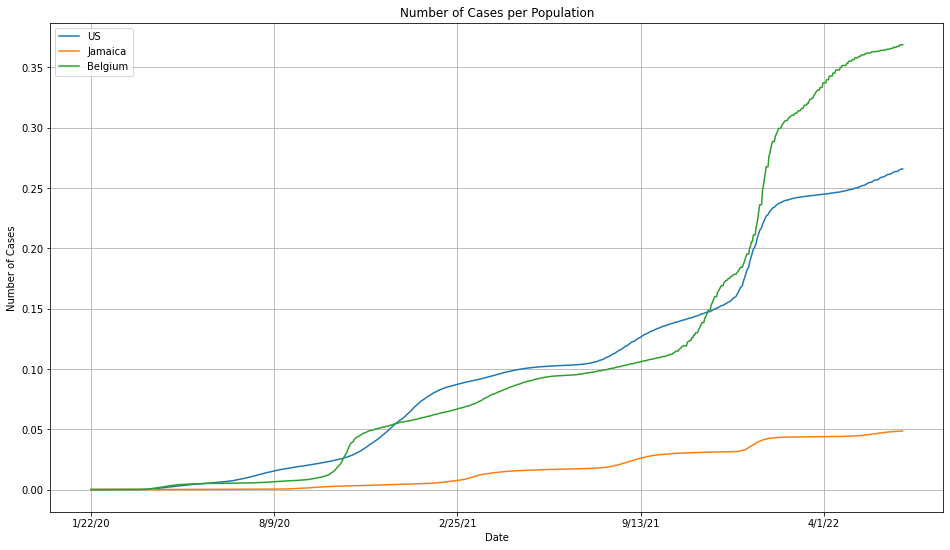

In [49]:
%matplotlib inline
df_plot.set_index('date').plot(title="Number of Cases per Population",ylabel = "Number of Cases",xlabel = "Date",grid="on",figsize=(16,9))

## Task 2:
- The vaccination rate (percentage of the population) over time for 3 countries

In [50]:
vaccinationPath = 'https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv'
pd_vaccination_Data = pd.read_csv(vaccinationPath, usecols = ['Date','Country_Region','People_fully_vaccinated'],parse_dates=['Date'])

In [51]:
pd_vaccination_Data = pd_vaccination_Data[pd_vaccination_Data['Country_Region'].isin(country_list)]

In [52]:
pd_vaccination_Data

,Country_Region,Date,People_fully_vaccinated
27,US,2020-12-20,0.0
33,US,2020-12-21,0.0
40,US,2020-12-22,0.0
49,US,2020-12-23,0.0
61,US,2020-12-24,0.0
...,...,...,...
261597,Jamaica,2022-06-27,708689.0
261914,US,2022-06-27,222123223.0
261992,Belgium,2022-06-28,9150446.0
262271,Jamaica,2022-06-28,709168.0


In [53]:
pivot = pd.pivot_table(
    data=pd_vaccination_Data,                                    
    index='Date',                               
    columns='Country_Region',                        
    values='People_fully_vaccinated',    
                             
    )

pivot = pivot.fillna(0)

In [54]:
for each in country_list:
    pivot[each] = np.array(pivot[each]/float(populationCsv[each])*100)

In [55]:
pivot

Country_Region,Belgium,Jamaica,US
Date,,,
2020-12-20,0.000000,0.000000,0.000000
2020-12-21,0.000000,0.000000,0.000000
2020-12-22,0.000000,0.000000,0.000000
2020-12-23,0.000000,0.000000,0.000000
2020-12-24,0.000000,0.000000,0.000000
...,...,...,...
2022-06-24,80.103332,24.128211,67.892828
2022-06-25,80.103332,24.137922,67.892828
2022-06-26,80.103332,24.137922,67.892828


<AxesSubplot:title={'center':'Vaccination Rate'}, xlabel='Date', ylabel='Number of Vaccination'>

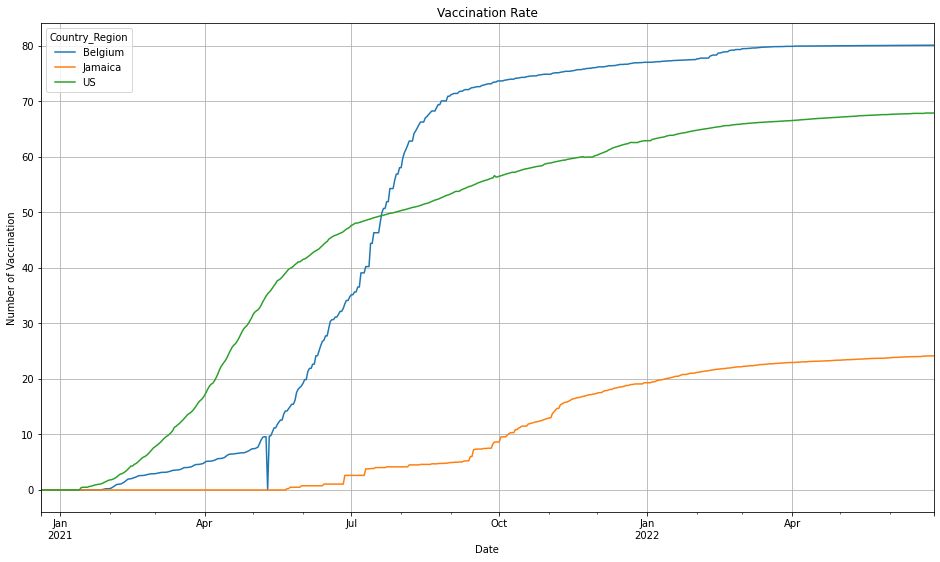

In [56]:
pivot.plot(title="Vaccination Rate",ylabel= "Number of Vaccination",xlabel = "Date",grid="on",figsize=(16,9))